In [ ]:
#Working dimensionality redufction TO:
#space and time efficiency
#visualization (so we can analyze with human eyes)

#I'm gonna build a PCA and compare it to T-SNE and LDA (3 DR methods total)



In [25]:
import numpy as np #math
np.random.seed(1) #debugging

In [26]:
#step 1: create the data set 

mu_vec1 = np.array([0,0,0]) #sample mean or the center of the gaussian
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]]) #sample covariance  or standard deviation

class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T #generate a multivariate_normal, just like a gaussian

print(class_sample1)
# 3 x 20 matrix (3 columns with 20 rows)


[[-0.02461696  1.96710175  1.62765075  0.86334532 -1.23005814 -0.62353073
   0.80186103 -0.10174587  0.52946532  0.61838026 -0.31011677  2.18697965
  -0.13644474 -1.12201873  0.24879916 -0.17470316  2.19069973  0.90148689
   0.04366899 -0.28730786]
 [-0.77516162 -1.85798186  0.3380117  -0.1809203   0.5505375   0.52057634
   0.0465673   0.86888616  0.13770121  0.23249456 -2.43483776  0.44136444
  -0.11905419 -0.51709446 -0.29664115  0.98633519 -1.89636092  2.52832571
  -0.22631424  0.68006984]
 [ 1.27375593  1.23616403 -1.19926803 -0.60392063  0.79280687 -1.14434139
  -0.18656977  0.75041164  0.07782113  0.68255141  1.0388246  -0.10015523
   0.01740941 -0.99702683  0.49521132  0.2135339  -0.64691669 -0.24863478
   1.33145711 -0.3198016 ]]


In [27]:
mu_vec2 = np.array([1,1,1]) #sample mean or the center of the gaussian
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]]) #sample covariance  or standard deviation

class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T #generate a multivariate_normal, just like a gaussian

print(class_sample2)
# 3 x 20 matrix (3 columns with 20 rows)


[[-0.27255876  2.29322588  1.5627611   0.9268873   2.90465871 -0.62743834
   1.81095167  1.82400562 -0.33195167  0.10944442  0.6735005   0.41347606
   1.62336218  1.12910158  2.55880554  3.44936865  0.2996015   1.20183018
   0.87953543  0.33424548]
 [ 1.31354772  0.88955297  1.24073709  2.16033857  2.1110567   1.60231928
   2.04444209  0.43769457 -0.76068856 -0.1191154  -0.34267579 -0.23685338
   0.56504332  2.6169496   1.1094027   0.45422583  0.79660555  1.66102029
  -0.23312074 -0.67419581]
 [ 1.50318481  0.38263794  1.28066508  1.36949272  1.6590498   1.4202822
   0.59912181  2.95487808 -0.65072127  2.9560789   2.11438298  1.87583893
   2.40754     1.50274088 -0.2197444   0.80116214  1.24266944  2.79215821
  -0.18231813  1.82502982]]


In [ ]:
%pylab inline

#plotting
from matplotlib import pyplot as plt

#figure, width and height
fig = plt.figure(figsize=(8,8))
#3d subplot
#These are subplot grid parameters encoded as a single integer, so 1x1 grid 1st subplot
ax = fig.add_subplot(111, projection='3d')
#fontsize
plt.rcParams['legend.fontsize'] = 10

#plot samples
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:],
        'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:],
        '^', markersize=8, alpha=0.5, color='green', label='class2')

ax.legend(loc='upper right')

plt.show()

In [40]:

#step3- merge data into 1 big data set 
all_samples = np.concatenate((class1_sample, class2_sample),axis=1)

In [41]:
all_samples

array([[ 1.62434536, -1.07296862,  1.74481176, -0.24937038, -0.3224172 ,
        -1.09989127,  0.04221375,  1.14472371,  0.90085595, -0.93576943,
        -0.69166075, -0.84520564, -1.11731035,  0.74204416, -0.74715829,
        -0.63699565,  0.12015895, -0.35224985, -0.20889423,  0.93110208,
         0.24560206,  0.70190716,  2.13162939, -0.39649634,  1.16003707,
        -1.02220122,  1.23009474,  0.79924193,  1.19829972,  1.37756379,
         2.19891788,  0.36126959,  0.65614632,  1.69803203,  1.40349164,
         1.16938243,  0.73378149,  1.31515939,  1.35054598, -0.61577235],
       [-0.61175641,  0.86540763, -0.7612069 ,  1.46210794, -0.38405435,
        -0.17242821,  0.58281521,  0.90159072, -0.68372786, -0.26788808,
        -0.39675353, -0.67124613,  0.2344157 , -0.19183555,  1.6924546 ,
         0.19091548,  0.61720311, -1.1425182 ,  0.58662319,  0.28558733,
         2.25286816,  1.48851815,  2.51981682, -0.44411381,  1.87616892,
         0.69379599,  1.76201118,  1.18656139,  1.

In [42]:
all_samples.T

array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ],
       [-0.24937038,  1.46210794, -2.06014071],
       [-0.3224172 , -0.38405435,  1.13376944],
       [-1.09989127, -0.17242821, -0.87785842],
       [ 0.04221375,  0.58281521, -1.10061918],
       [ 1.14472371,  0.90159072,  0.50249434],
       [ 0.90085595, -0.68372786, -0.12289023],
       [-0.93576943, -0.26788808,  0.53035547],
       [-0.69166075, -0.39675353, -0.6871727 ],
       [-0.84520564, -0.67124613, -0.0126646 ],
       [-1.11731035,  0.2344157 ,  1.65980218],
       [ 0.74204416, -0.19183555, -0.88762896],
       [-0.74715829,  1.6924546 ,  0.05080775],
       [-0.63699565,  0.19091548,  2.10025514],
       [ 0.12015895,  0.61720311,  0.30017032],
       [-0.35224985, -1.1425182 , -0.34934272],
       [-0.20889423,  0.58662319,  0.83898341],
       [ 0.93110208,  0.28558733,  0.88514116],
       [ 0.24560206,  2.25286816,  1.512

In [43]:
#Step4 - compute the dimensional mean vector, it will help compute the covariance matrix
#mean for each feature
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])
#we ll get the mean by adding all of these mean valyes and divide by 3

#3d mean vector
mean_vector = np.array([[mean_x], [mean_y], [mean_z]])
print(mean_vector)

[[0.41667492]
 [0.69848315]
 [0.49242335]]


In [47]:
#step5 compute the covariance matrix now
cov_mat = np.zeros((3,3))

for i in range ((all_samples.shape[1])):
    cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[0.9868668  0.26943262 0.2855759 ]
 [0.26943262 0.92914135 0.30682016]
 [0.2855759  0.30682016 1.27528118]]


In [48]:
#step6 computer eigenvectors 

eig_val, eig_vec = np.linalg.eig(cov_mat)

print('values')
print(eig_val)
print('direction')
print(eig_vec)

values
[1.67100943 0.83832597 0.68195393]
direction
[[-0.49210223 -0.64670286  0.58276136]
 [-0.47927902 -0.35756937 -0.8015209 ]
 [-0.72672348  0.67373552  0.13399043]]


In [52]:
#step 7 sort them
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i])
             for i in range(len(eig_val))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

1.671009430532869
0.8383259734158451
0.6819539303101815


In [53]:
#step 8 - choose k eigvectors
#stack arrays in sequence horizontally - hstack
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1),
                      eig_pairs[1][1].reshape(3,1)))
print('matrix W:\n', matrix_w)


matrix W:
 [[-0.49210223 -0.64670286]
 [-0.47927902 -0.35756937]
 [-0.72672348  0.67373552]]


In [54]:
#step 9 transform our data using the eigenpair
transformed = matrix_w.T.dot(all_samples)
print( transformed )

[[-0.12230714  1.78582073 -0.72564846  0.91911067 -0.48120545  1.26186049
   0.49974121 -1.36060904 -0.02630959  0.20346559  1.02990798  0.74684543
  -0.76873682  0.37184198 -0.48040292 -1.30433953 -0.57308381  0.9748035
  -0.78806782 -1.23832629 -2.30009539 -1.73062935 -4.57170736  0.04785487
  -2.42616804 -1.15792646 -2.01497976 -1.98672036 -1.36534078 -2.76311357
  -2.1041081  -1.64296088 -1.09921946 -2.71718701 -1.38545546 -1.44331476
  -0.58485289 -1.63411201 -1.21353834 -1.73760916]
 [-1.18757151 -1.16617976 -0.64124251 -1.74952646  1.10969495  0.18151348
  -0.97722286 -0.72412904 -0.42090149  1.05827266  0.12619324  0.77808138
   1.75701561 -1.00931473 -0.08774954  1.75869787 -0.09616466  0.4009659
   0.49058694 -0.10791262  0.05492635 -0.3633537  -0.13330484  0.74907576
  -0.53466984  1.6445517  -0.90160187  0.00885182 -0.95318056  0.14270558
  -1.4249294  -0.01678979 -0.54147105  0.20291779 -1.54140242 -1.3474191
  -1.09515232 -1.41599875 -0.11407398  0.58889408]]


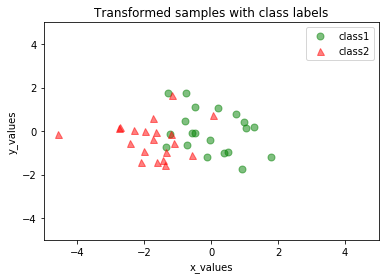

In [55]:

plt.plot(transformed[0,0:20], transformed[1,0:20],
         'o', markersize=7, color='green', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40],
         '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

In [ ]:
# compare PCA vs T-SNE vs LDA
# 3 most popular DR techniques


#PCA is label agnostic -- it treats the entire data set as a whole. 
#LDA, on the other hand, tries to explicitly model difference between classes 
#(labels) within the data. 

#PCA performs unsupervised transformation, while LDA is supervised. 


Best visualizations
T-SNE

Best generic dim r method 
PCA 

Best for supervised
LDA


T-SNE
Step 1 - Compute similarity matrix between all feature vectors
Step 2 - Compute similarity matrix from map points
Step 3 - Use gradient descent to minimimze distance between matrices

LDA (Linear Discriminant Analysis)

Similar to LDA except Compute the  M mean vectors for the different classes from the dataset
instead of #Take the whole dataset consisting of dd-dimensional samples ignoring the class labels
Compute the dd-dimensional mean vector (i.e., the means for every dimension of the whole dataset).